In [ ]:
import numpy as np
import torch 
raw_data = np.load("data/tcg_data.npy", allow_pickle=True)
unpacked = [torch.tensor(seq) for seq in raw_data]
tensor_data = torch.cat(unpacked, axis=0)

In [ ]:
raw_data[0].shape 

In [ ]:
tensor_data.shape 

In [ ]:
def one_hot_encoding(n_cls, label):
    """ 
        n_cls (int): number of classes
        label (tensor): true label of the data, tensor format 
    """
    one_hot_label = torch.eye(n_cls)[label]
    return one_hot_label
    

In [ ]:
import json 
with open("data/tcg.json") as f:
    label_json = json.load(f)

seq_labels = label_json['sequences']


In [ ]:
for one_label in seq_labels:
    anno = one_label["annotation"]
    last_phase = anno[-1]
    if last_phase[0]!= "inactive":
        print(last_phase[0])
        

In [ ]:
seq_labels = label_json['sequences']

In [ ]:
for one_label in seq_labels:
    num_label = {"inactive": 0, "stop": 1, "go": 2, "clear": 3}
    

In [ ]:
seq_labels[0]

In [ ]:
one_label["annotation"]

no need to care about the absolute value of the `weight` in cross entropy loss (if reduction is not set to `sum`)

just look at relative scale

In [ ]:
import torch 
import torch.nn as nn 

data = torch.randn(10,18)
label = torch.randint(0, 4, (10,))
model = nn.Linear(18, 4)

weight = torch.ones(4)

criterion1 = nn.CrossEntropyLoss(weight=None)
criterion2 = nn.CrossEntropyLoss(weight=weight)
criterion3 = nn.CrossEntropyLoss(weight=weight/4)
criterion4 = nn.CrossEntropyLoss(weight=weight/10)

loss1 = criterion1(model(data), label)
loss2 = criterion2(model(data), label)
loss3 = criterion3(model(data), label)
loss4 = criterion4(model(data), label)

print(loss1)
print(loss2)
print(loss3)
print(loss4)

pass 

In [ ]:
import pandas as pd
file_path = "./data/TITAN/titan_0_4/clip_16.csv"
df = pd.read_csv(file_path)
df=df[df["label"]=="person"]
person_attrs = df.groupby("obj_track_id").get_group(7)
person_attrs["attributes.Atomic Actions"].values

In [ ]:
import io
import numpy as np
import PIL
import requests
import torch
import openpifpaf
import matplotlib.pyplot as plt 

print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

In [ ]:
pil_im = PIL.Image.open(r".\out\titan_clip\images\000018.png").convert('RGB')
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k30')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

In [ ]:
im = np.asarray(pil_im)
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)
    current_fig = plt.gcf()
    ax.text(100, 100, "some stupid stuff")
    plt.show()

In [ ]:
import time 
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    time.sleep(1)
    print("Hello World! {}".format(i))

In [ ]:
import io
import numpy as np
import PIL
import requests
import torch
import openpifpaf
import matplotlib.pyplot as plt 
from models import MultiHeadMonoLoco

print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

In [ ]:
# prepare recognition model and pifpaf model 
ckpt_dir = "./out/trained/TITAN_Baseline_2021-11-04_12.01.38.803868.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiHeadMonoLoco(34, [4, 7, 9, 13, 4], 128, 0.2, 3).to(device)
model.load_state_dict(torch.load(ckpt_dir))
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k30')

In [ ]:
def predict_action(model, pifpaf_pred):

    kp_list = []
    for pred in pifpaf_pred:
        kp_list.append(np.array(pred.data).reshape(-1, 3)[:, :2])
    # kp_list = np.concatenate(kp_list, axis=0)
    kp_list = torch.tensor(kp_list, dtype=torch.float).to(device)
    pred = model(kp_list)
    result_list = []
    for idx, one_pred in enumerate(pred):
        _, pred_class = torch.max(one_pred.data, -1)
        result_list.append(pred_class.detach().cpu().numpy())
    result_list = np.array(result_list).T
    # result_list[0] will be the actions of the first person, in number
    return result_list

In [ ]:
import glob 
import time 
from IPython.display import clear_output

clip_num = 16
all_img_files = glob.glob("./data/TITAN/images_anonymized/clip_{}/images/*.png".format(clip_num))

In [ ]:
for img_path in all_img_files:
    save_path = img_path.replace("/images/", "/annotated/").replace(".png", ".jpg")
    clear_output(wait=True)
    pil_im = PIL.Image.open(img_path).convert('RGB')
    predictions, gt_anns, image_meta = predictor.pil_image(pil_im)
    actions = predict_action(model, pifpaf_pred=predictions)
    boxes = [pred.data.max(axis=0)[:2] for pred in predictions]
    im = np.asarray(pil_im)
    annotation_painter = openpifpaf.show.AnnotationPainter()
    with openpifpaf.show.image_canvas(im) as ax:
        annotation_painter.annotations(ax, predictions, alpha=0.5)
        # current_fig = plt.gcf()
        ax.text(100, 100, "pifpaf detects {} person".format(len(predictions)))
        for action, box in zip(actions, boxes):
            # atomic and simple context 
            ax.text(x=box[0], y=box[1], s=str(action[2:4]))
        plt.show()
        plt.savefig(save_path)
    time.sleep(1)


In [ ]:
for pred in predictions:
    x, y, w, h = pred['bbox']
    print(x, y, w, h)

In [1]:
import matplotlib.pyplot as plt 
plt.ioff()

xs = list(range(100))

plt.plot(xs, xs)

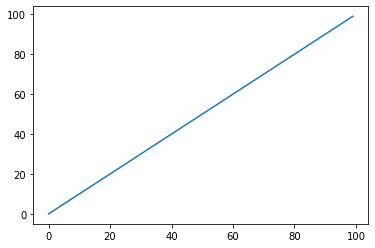

In [2]:
plt.show() 